<a id="top"></a>
# Table of content
- **A An overview of the dataset** [Go to Part A](#Part_A)
- **B Data Cleaning** [Go to Part B](#Part_B)
- **C Preliminary Exploratory Data Analysis (EDA)** [Go to Part C](#Part_C)


here is top of the notebook
[Go to the bottom of this notebook](#bottom)


<a id="Part_A"></a>
# A An overview of the dataset

## 1 Import the data as a pandas DataFrame into your notebook

In [1]:
# Import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline


In [2]:
# Loading the dataset with Pickle
df = pd.read_pickle("data_385k.pkl", 'zip')


In [3]:
import numpy as np

## 2 Check the number of rows and columns

In [4]:
# Calculation of the number of rows
len(df)

385384

In [5]:
# Calculation of the number of columns
len(df.columns)

99

**Comment:** There are 385384 rows and 99 columns

## 3 Display a few entries from the DataFrame

In [6]:
# Display a few entries using head()
df.head(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comments:** We can notice a lot of NaN values (Not a number)

## 4 Check the data type for each column. Create 3 separate lists to hold the names of columns of the same data type

In [7]:
# Data type for each column is checked with the info() method 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

**Comments:** There are 50 columns with float numbers, 1 column with integer and 48 columns with an object 

In [8]:
# Creation of the object list using dtypes
object_list = df.select_dtypes(include = "object").columns
print(object_list)

Index(['barcode', 'calcium_unit', 'carbohydrates_unit', 'cholesterol_unit',
       'copper_cu_unit', 'country', 'created_at', 'energy_kcal_unit',
       'energy_unit', 'fat_unit', 'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_unit', 'fiber_insoluble_unit',
       'fiber_soluble_unit', 'fiber_unit', 'folate_total_unit',
       'folic_acid_unit', 'hundred_unit', 'ingredients_en', 'iron_unit',
       'magnesium_unit', 'manganese_mn_unit',
       'monounsaturated_fatty_acids_unit', 'phosphorus_unit',
       'polyunsaturated_fatty_acids_unit', 'portion_unit', 'potassium_k_unit',
       'product_name_de', 'product_name_en', 'product_name_fr', 'protein_unit',
       'salt_unit', 'saturated_fat_unit', 'sodium_unit', 'sugars_added_unit',
       'sugars_unit', 'unit', 'updated_at', 'vitamin_a_iu_unit',
       'vitamin_b12_cobalamin_unit', 'vitamin_b1_thiamin_unit',
       'vitamin_b2_riboflavin_unit', 'vitamin_b3_niacin_unit',
       'vitamin_b5_panthothenic_acid_unit', 'vi

In [9]:
# Creation of the float list using dtypes
float_list = list(df.select_dtypes(include = "float64").columns)
float_list

['alcohol_by_volume',
 'calcium_per_hundred',
 'carbohydrates_per_hundred',
 'carbohydrates_per_portion',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_kcal_per_portion',
 'energy_per_hundred',
 'energy_per_portion',
 'fat_per_hundred',
 'fat_per_portion',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_per_portion',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'portion_quantity',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'protein_per_portion',
 'quantity',
 'salt_per_hundred',
 'salt_per_portion',
 'saturated_fat_per_hundred',
 'saturated_fat_per_portion',
 'sodium_per_hundred',
 'sodium_per_portion',
 's

In [10]:
# Creation of the integer list using dtypes
integer_list = list(df.select_dtypes(include = "int64").columns)
integer_list

['id']

**Comments:** Most of the data are float numbers or objects
 

## 5 Check the data by the type of information they hold. Create 3 lists

In [11]:
# store all columns labels into a columns_list
columns_list = list(df.columns)
columns_list

['alcohol_by_volume',
 'barcode',
 'calcium_per_hundred',
 'calcium_unit',
 'carbohydrates_per_hundred',
 'carbohydrates_per_portion',
 'carbohydrates_unit',
 'cholesterol_per_hundred',
 'cholesterol_unit',
 'copper_cu_per_hundred',
 'copper_cu_unit',
 'country',
 'created_at',
 'energy_kcal_per_hundred',
 'energy_kcal_per_portion',
 'energy_kcal_unit',
 'energy_per_hundred',
 'energy_per_portion',
 'energy_unit',
 'fat_per_hundred',
 'fat_per_portion',
 'fat_unit',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_per_hundred',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_per_hundred',
 'fiber_insoluble_unit',
 'fiber_per_hundred',
 'fiber_per_portion',
 'fiber_soluble_per_hundred',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_per_hundred',
 'folate_total_unit',
 'folic_acid_per_hundred',
 'folic_acid_unit',
 'hundred_unit',
 'id',
 'ingredients_en',
 'iron_per_hundred',
 'iron_unit',
 'magnesium_per_hundred',
 'ma

In [12]:
# Creating the lists "per_hundred", "per_unit", "per_portion", "Other_columns" using a for loop and endswith method
per_hundred_list = []
unit_list = []
per_portion_list = []
other_columns_list = []

for y in columns_list:
    if y.endswith("_per_hundred") == True:
        per_hundred_list.append(y)
        
    elif y.endswith("_unit") == True:
        unit_list.append(y)  

    elif y.endswith("_per_portion") == True:
        per_portion_list.append(y) 
        
    else:      
        other_columns_list.append(y)
        

In [13]:
per_hundred_list, unit_list, other_columns_list, per_portion_list, 

(['calcium_per_hundred',
  'carbohydrates_per_hundred',
  'cholesterol_per_hundred',
  'copper_cu_per_hundred',
  'energy_kcal_per_hundred',
  'energy_per_hundred',
  'fat_per_hundred',
  'fatty_acids_total_saturated_per_hundred',
  'fatty_acids_total_trans_per_hundred',
  'fiber_insoluble_per_hundred',
  'fiber_per_hundred',
  'fiber_soluble_per_hundred',
  'folate_total_per_hundred',
  'folic_acid_per_hundred',
  'iron_per_hundred',
  'magnesium_per_hundred',
  'manganese_mn_per_hundred',
  'monounsaturated_fatty_acids_per_hundred',
  'phosphorus_per_hundred',
  'polyunsaturated_fatty_acids_per_hundred',
  'potassium_k_per_hundred',
  'protein_per_hundred',
  'salt_per_hundred',
  'saturated_fat_per_hundred',
  'sodium_per_hundred',
  'sugars_added_per_hundred',
  'sugars_per_hundred',
  'vitamin_a_iu_per_hundred',
  'vitamin_b12_cobalamin_per_hundred',
  'vitamin_b1_thiamin_per_hundred',
  'vitamin_b2_riboflavin_per_hundred',
  'vitamin_b3_niacin_per_hundred',
  'vitamin_b5_panthoth

<a id="Part_B"></a>
# B Data Cleaning


## 1 Checking the number of duplicates, remove them, and shape

In [14]:
# Calculating the number of duplicates
df.duplicated().sum()

10500

There are 10500 duplicates into this dataframe

In [15]:
df.shape

(385384, 99)

In [16]:
# Removing the duplicates and store the result into df_2
df_2 = df.drop_duplicates().copy()

In [17]:
df_2.shape

(374884, 99)

The initial dataframe has 2 dimensions with 385 384 rows and 99 columns, after removing the duplicates, **the dataframe has 2 dimensions with 374 884 rows by 99 columns**

## 2 Finding the missing values

### a) Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest__

In [18]:
# Calculate the number of isnull values per column
missing_values = df.isnull().sum()
missing_values

alcohol_by_volume                                       0
barcode                                                 0
calcium_per_hundred                                120405
calcium_unit                                       120298
carbohydrates_per_hundred                           33833
                                                    ...  
vitamin_c_ascorbic_acid_unit                       185075
vitamin_d_d2_d3_international_units_per_hundred    318360
vitamin_d_d2_d3_international_units_unit           318359
zinc_per_hundred                                   376744
zinc_unit                                          376726
Length: 99, dtype: int64

In [19]:
# Calculate the percentage of isnull values per column
missing_values_in_percent = np.round(df.isnull().mean() * 100, 2)
missing_values_in_percent

alcohol_by_volume                                   0.00
barcode                                             0.00
calcium_per_hundred                                31.24
calcium_unit                                       31.22
carbohydrates_per_hundred                           8.78
                                                   ...  
vitamin_c_ascorbic_acid_unit                       48.02
vitamin_d_d2_d3_international_units_per_hundred    82.61
vitamin_d_d2_d3_international_units_unit           82.61
zinc_per_hundred                                   97.76
zinc_unit                                          97.75
Length: 99, dtype: float64

In [20]:
# Build a dataframe to store the number of missing values and their percentage for each column. 
d = {"Missing values": missing_values, "Percentage of missing values": missing_values_in_percent }
missing_summary = pd.DataFrame(index=columns_list, columns=["Missing values", "Percentage of missing values"], data=d).sort_values(by="Percentage of missing values", ascending=False)
missing_summary

,Missing values,Percentage of missing values
sodium_per_portion,384381,99.74
fiber_insoluble_unit,381874,99.09
fiber_insoluble_per_hundred,381875,99.09
copper_cu_per_hundred,381773,99.06
copper_cu_unit,381773,99.06
...,...,...
portion_quantity,0,0.00
barcode,0,0.00
id,0,0.00
hundred_unit,0,0.00


### b) Use missingno to help you visualize where the missings are in the whole data frame and when missing values overlap between columns or not

In [21]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

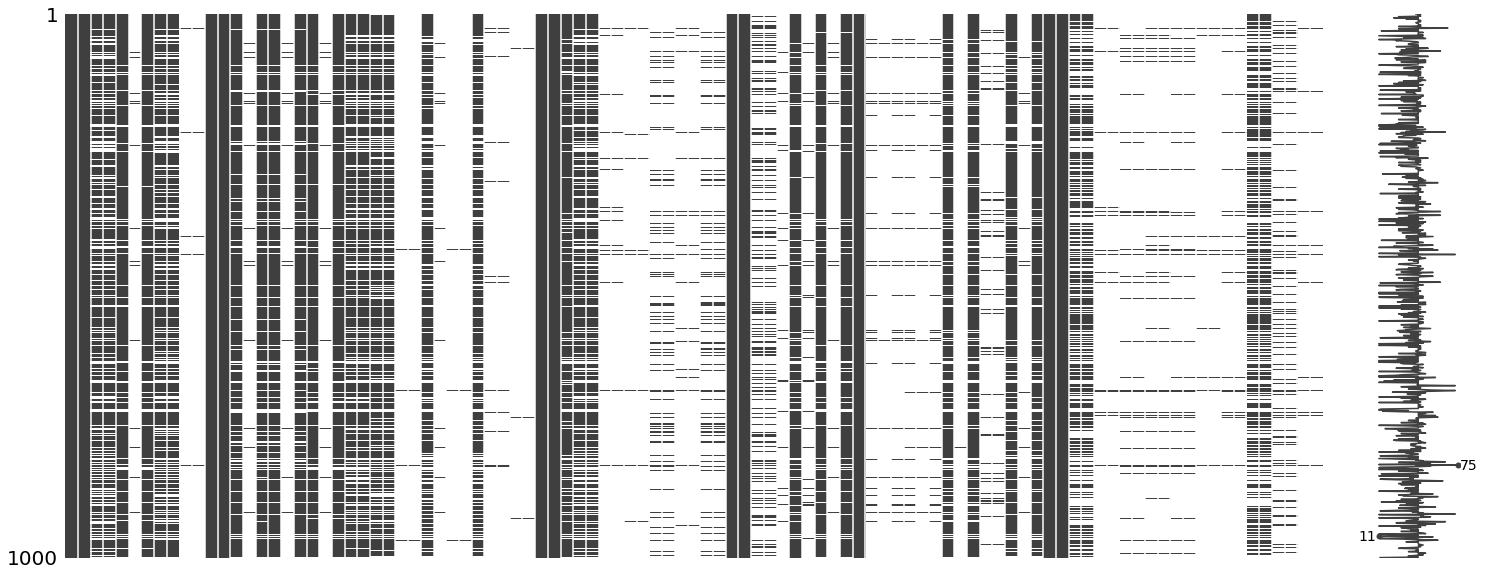

In [22]:
# Use of matrix method and sampling to vizualize the missings
msno.matrix(df.sample(1000))

**Comment:** As the number of column is high, labels are not displayed. However, we can see that missing values appear in blank and columns without missing values appear in black. As mentionned before in the missing_summary dataframe, there are many columns with very few datas and many columns with missing datas.  

### c) Use the 4 lists created in Task A to create 4 line plots or bar charts that show the percentages of missing values in each list

        **title**


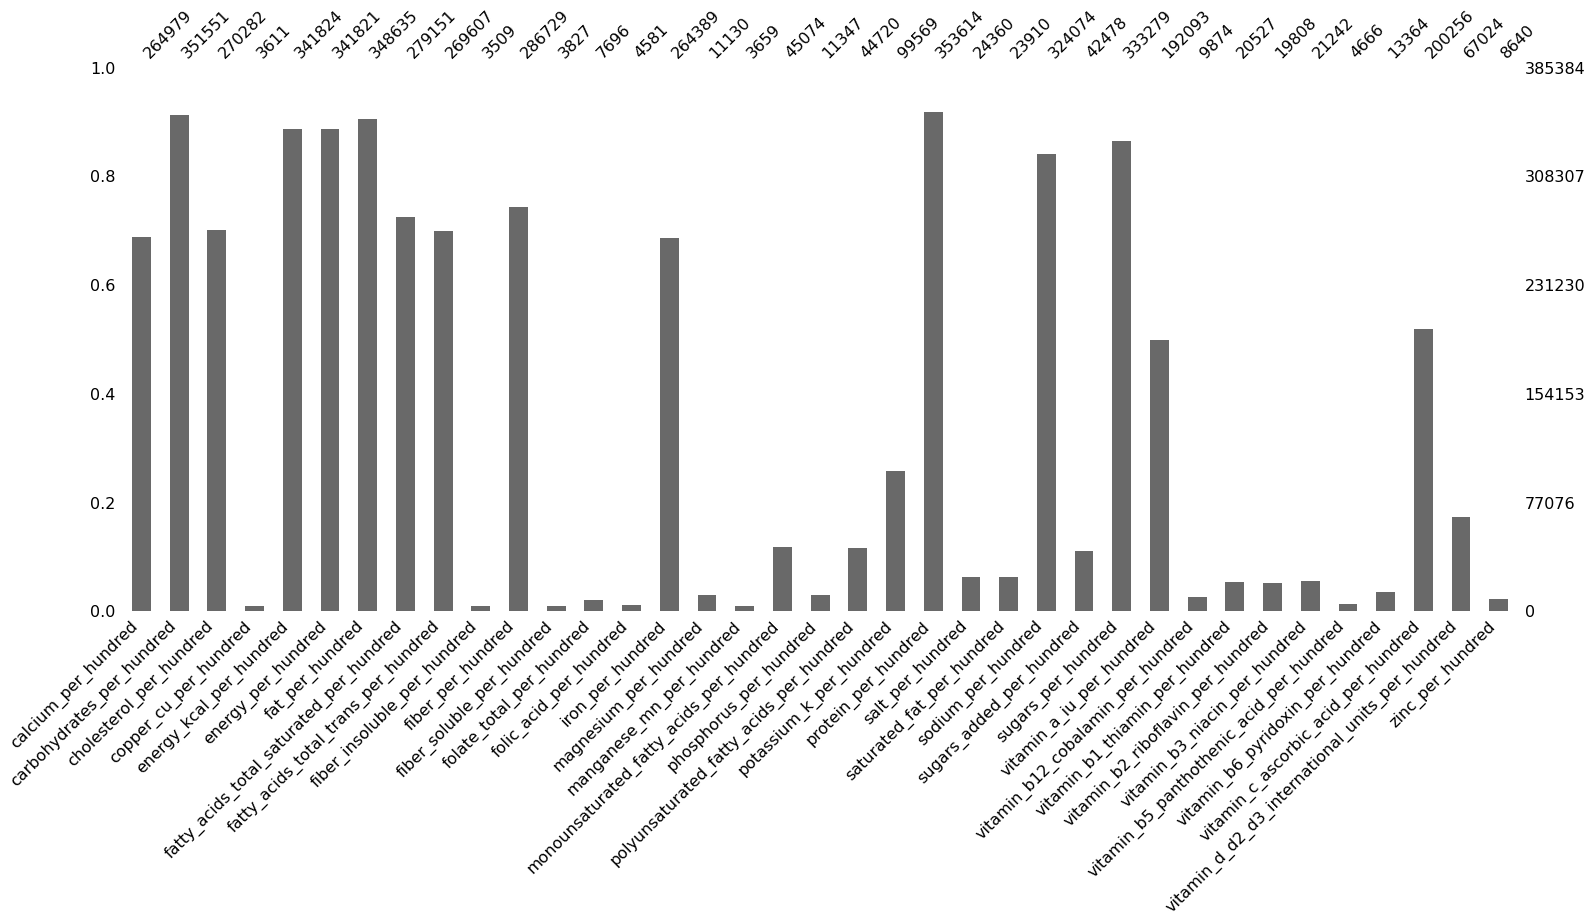

In [23]:
# Plot a bar chart with per_hundred columns
print("        **title**")

msno.bar(df[per_hundred_list]);

<AxesSubplot:>

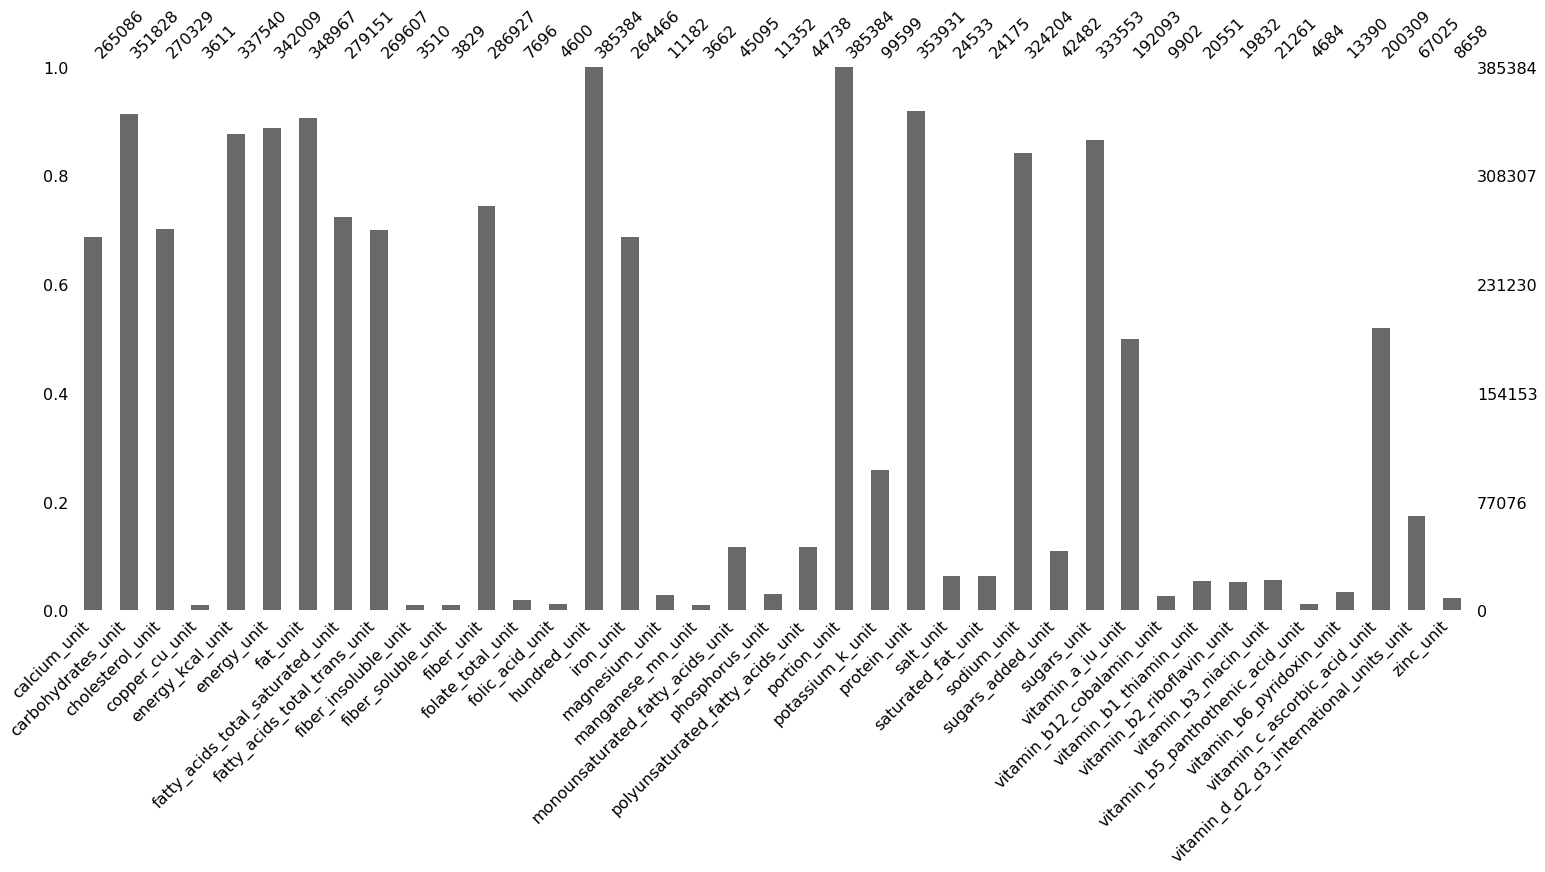

In [24]:
# Plot a bar chart with per_unit columns
msno.bar(df[unit_list])

<AxesSubplot:>

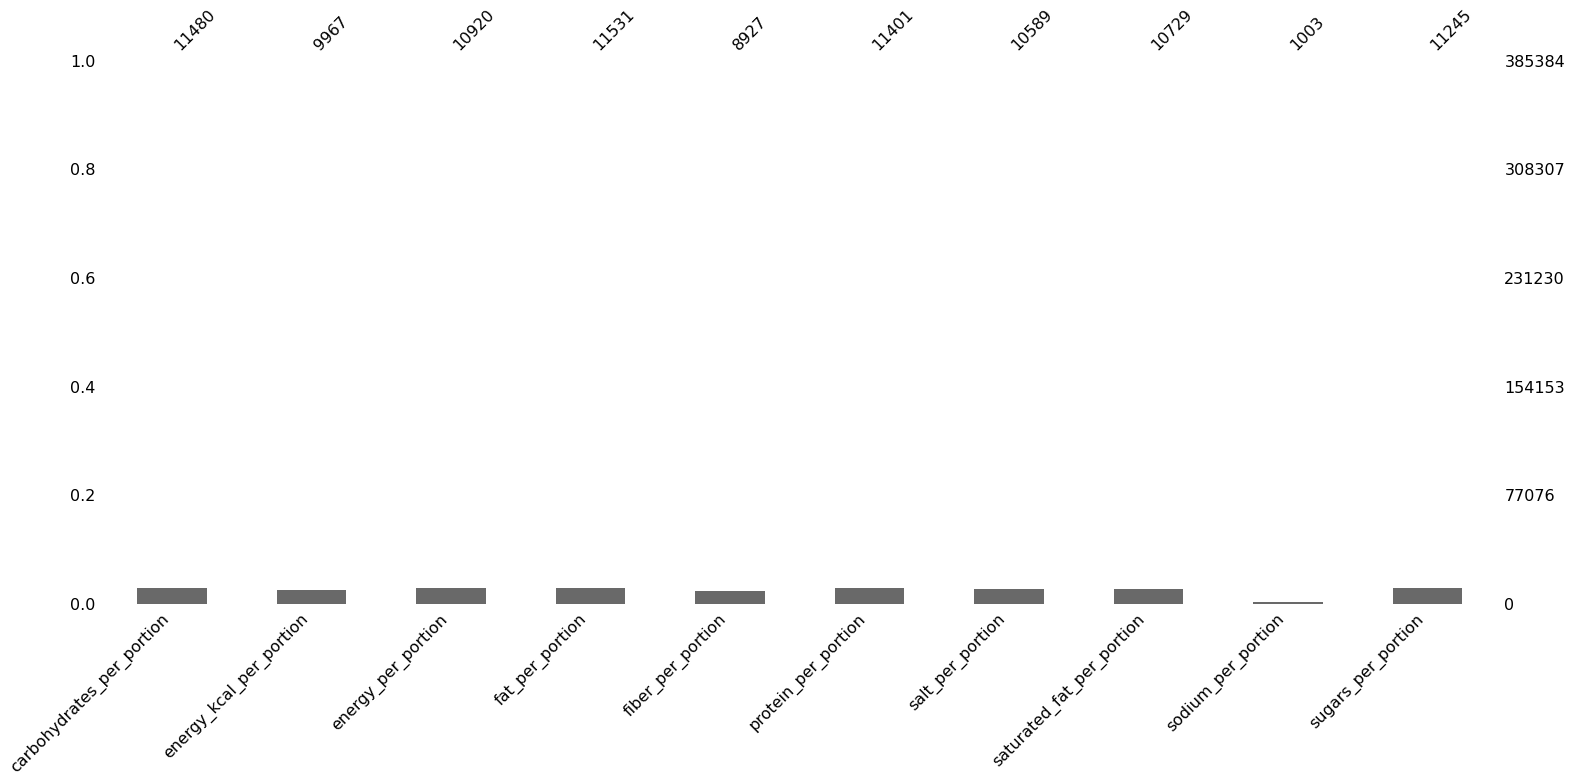

In [25]:
# Plot a bar chart with per_portion columns
msno.bar(df[per_portion_list])

<AxesSubplot:>

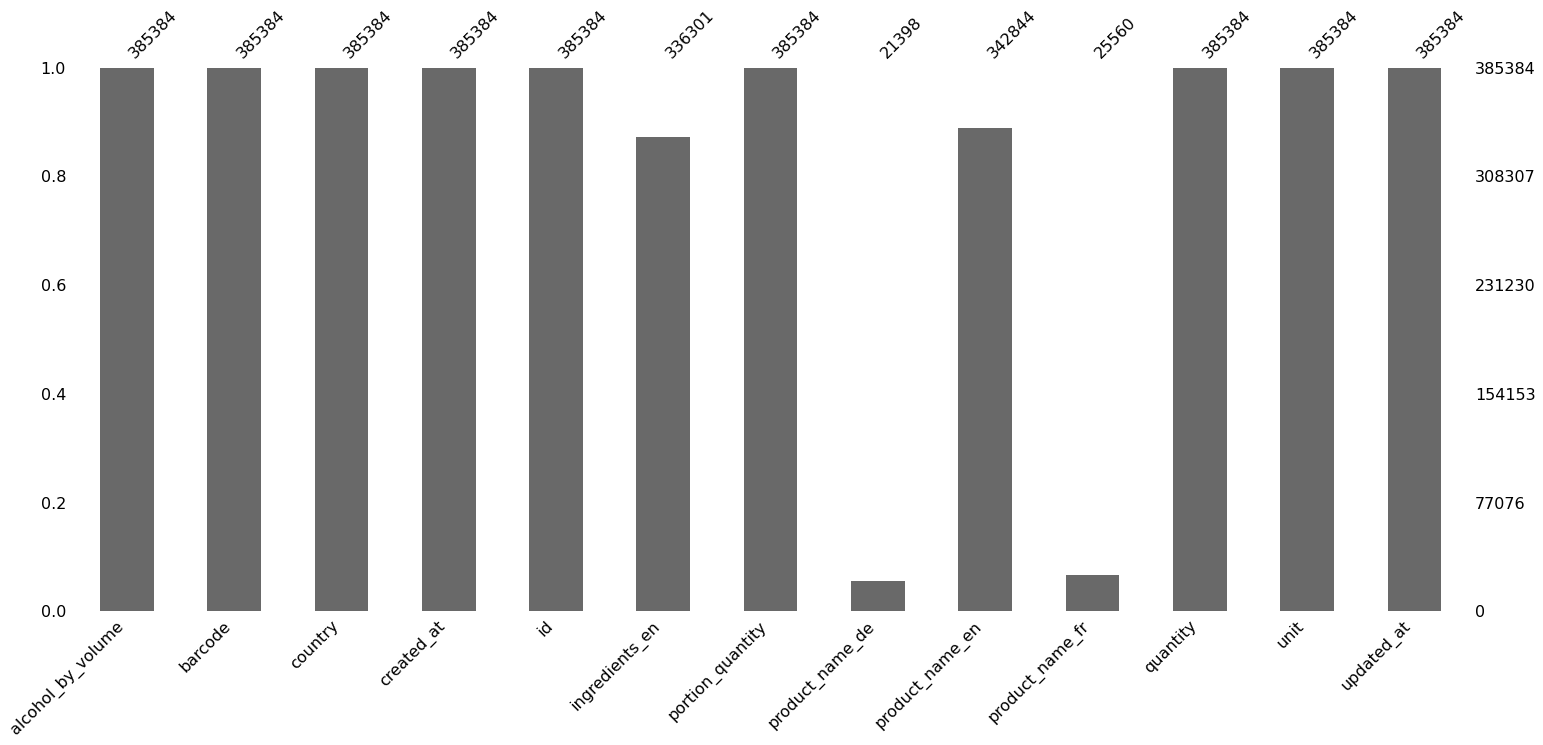

In [26]:
# Plot a bar chart with other_columns
msno.bar(df[other_columns_list])

**Comments:** We can see that there are a lot of missing data in "per_portion" columns while "other_columns" have few missing data.

## 3) Adress the missing values

### a) Remove rows and columns that are completely empty

There is no empty column. Looking at the dataframe with missing values and percentage above (question 2a), the emptiest column is empty at 99.7%. Hundred_unit and portion_unit don't have any missing values.

In [27]:
df[unit_list].isnull().sum()

calcium_unit                                120298
carbohydrates_unit                           33556
cholesterol_unit                            115055
copper_cu_unit                              381773
energy_kcal_unit                             47844
energy_unit                                  43375
fat_unit                                     36417
fatty_acids_total_saturated_unit            106233
fatty_acids_total_trans_unit                115777
fiber_insoluble_unit                        381874
fiber_soluble_unit                          381555
fiber_unit                                   98457
folate_total_unit                           377688
folic_acid_unit                             380784
hundred_unit                                     0
iron_unit                                   120918
magnesium_unit                              374202
manganese_mn_unit                           381722
monounsaturated_fatty_acids_unit            340289
phosphorus_unit                

### b) Start with your list of _unit columns, check some of them and show what information they hold and fillup missing values with most frequent values**

In [28]:
df_2[unit_list].head(5)

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,g,NaN,NaN,kCal,kJ,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comments:** We notice a lot of missing units. To adress this issue, we can check the values inside these columns and extend the result to missing values. 

In [29]:
# Creation of a for loop which fill missing values with most frequent units
for unit in unit_list:
    #print(df_amended[unit].isnull().sum())
    most_common = df_2[unit].value_counts().idxmax()
    #print(most_common)
    df_2[unit].fillna(most_common, inplace=True)
df_2[unit].isnull().sum()


0

In [30]:
df_2[unit_list].isnull().sum()

calcium_unit                                0
carbohydrates_unit                          0
cholesterol_unit                            0
copper_cu_unit                              0
energy_kcal_unit                            0
energy_unit                                 0
fat_unit                                    0
fatty_acids_total_saturated_unit            0
fatty_acids_total_trans_unit                0
fiber_insoluble_unit                        0
fiber_soluble_unit                          0
fiber_unit                                  0
folate_total_unit                           0
folic_acid_unit                             0
hundred_unit                                0
iron_unit                                   0
magnesium_unit                              0
manganese_mn_unit                           0
monounsaturated_fatty_acids_unit            0
phosphorus_unit                             0
polyunsaturated_fatty_acids_unit            0
portion_unit                      

In [31]:
# Create a list to visualize the most frequent values for each unit
unit_values = []

for unit in unit_list:
    y = df_2[unit].value_counts().idxmax()
    unit_values.append(y)  
    
df_unit_list = pd.DataFrame(unit_values)


In [32]:
unit_values

['mg',
 'g',
 'mg',
 'mg',
 'kCal',
 'kJ',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'µg',
 'µg',
 'g',
 'mg',
 'mg',
 'mg',
 'g',
 'mg',
 'g',
 'g',
 'mg',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'IU',
 'µg',
 'mg',
 'mg',
 'mg',
 'mg',
 'mg',
 'mg',
 'IU',
 'mg']

### c) fill up the missing values of a column using other columns that hold similar information and apply it to Product_name_en column**


In [33]:
# Check the number of missing values in _product_name_eng_
df_2["product_name_en"].isnull().sum()

33165

There are **42 540** of missing values in the column "product_name_en"

In [34]:
# Check the number of existing value in the 3 product_name columns (English, Deutsch and French)
v1 = 385384 - df_2["product_name_en"].isnull().sum()
v2 = 385384 - df_2["product_name_de"].isnull().sum()
v3 = 385384 - df_2["product_name_fr"].isnull().sum()
(v1, v2, v3) 

(352219, 29648, 32185)

Most of the product names are in English, nevertheless, there are 21 398 names in Deutsch and 25 560 names in French which could be added into the english column

In [35]:
#replace missing values in Englisg product names:
#Count the initial number of missing English names and store it in a variable
initial_missing_en = df_2["product_name_en"].isnull().sum()

#Replace missing values in english product names with deutsch and french names
df_2["product_name_en"].fillna(value=df["product_name_de"], inplace=True)
df_2["product_name_en"].fillna(value=df["product_name_fr"], inplace=True)

#Count the final number of missing deutsch names and store it in a variable
final_missing_en = df_2["product_name_en"].isnull().sum()

#Report the number of english product names filled
filled_names_en = initial_missing_en - final_missing_en

(initial_missing_en, final_missing_en, filled_names_en)


(33165, 18866, 14299)

**18 299 product names** were filled with french and deutsch names, we can see that **24 241 products** do no have names at all. 

###**d) Third strategy : Fill missing values based on other data**

In [36]:
df_2["iron_per_hundred"].isnull().sum()
#

110495

There are **120 995 missing values** in the iron_per_hundred columns

In [37]:
# Visualize the first type of product which do not have values
selection_iron = df_2[["product_name_en", "iron_per_hundred"]].head(15)
selection_iron

,product_name_en,iron_per_hundred
0,Bio Spaghetti,NaN
1,Naturaplan Mozzarella,NaN
2,Caffè Mauro - Roasted organic coffee blend,NaN
3,Le chocolat Cailler - chocolate powder,NaN
4,Naturaplan Extra Dark Chocolate 70%,NaN
5,Cailler - Kakaopulver,NaN
6,Toblerone,NaN
7,Knöpfli flour,NaN
8,Naturaplan Bio Flower Honey,NaN
9,Maltesers,NaN


** We can see that those missing values can be coffee, chocolates, jam or pop corn. It lead us to the conclusion that the product may contain iron, but the supplier(s) of the data hasn't measured the iron concentration. 
We can extrapolate the data contained on other product to fill the NaN values with average iron content seen on other products. to do so we create a new column containing average values and original filled values

In [38]:
# Mean calulation of iron content 
df_2["iron_per_hundred"].mean().round(2)

7.62

The average iron per hundred content is 7.62mg

In [39]:
print(df_2["iron_per_hundred"].isnull().sum())
df_2["iron_per_hundred_amended"]= df_2["iron_per_hundred"].fillna(value=df_2["iron_per_hundred"].mean())
print(df_2["iron_per_hundred_amended"].isnull().sum())

110495
0


In [40]:
df_2["iron_per_hundred"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: iron_per_hundred, dtype: float64

In [41]:
print(df_2["iron_per_hundred"].isnull().sum())

110495


### e) Fourth strategy : filling missing values with text

In [42]:
df["ingredients_en"].fillna("ingredient_missing", inplace=True)
df["ingredients_en"].isnull().sum()

0

### f) Build up data analysis pipeline based of 20 000 row of non-missing data.
Drop columns which have more than 95% of missing values. 

In [43]:
# Build a list of column names with less than 95% of missing values. 
filter_df = df_2.isnull().sum() / len(df_2) < 0.95
filter_df.head(100)

alcohol_by_volume                                   True
barcode                                             True
calcium_per_hundred                                 True
calcium_unit                                        True
carbohydrates_per_hundred                           True
                                                   ...  
vitamin_d_d2_d3_international_units_per_hundred     True
vitamin_d_d2_d3_international_units_unit            True
zinc_per_hundred                                   False
zinc_unit                                           True
iron_per_hundred_amended                            True
Length: 100, dtype: bool

In [44]:
# Use a filter to select columns with True values 
filter = df_2.loc[:, filter_df]
filter.shape

(374884, 78)

The new dataframe has **77 columns and 385 384 rows**. 

In [45]:
# Save the dataset

# Name of the PKL file to create
pkl_filename = 'data_task_b.pkl'

# Open the file in binary mode and serialize the object
with open(pkl_filename, 'wb') as file:
    pickle.dump(df_2, file)

print(f"PKL file '{pkl_filename}' has been created.")

PKL file 'data_task_b.pkl' has been created.


<a id="Part_C"></a>
# C. Preliminary Exploratory Data Analysis (EDA)

In [46]:
# Load the datasets
#df_2 = pd.read_pickle("data_task_b.pkl")
#df = pd.read_pickle("data_385k.pkl", 'zip')

## 1) Explore categorical variables Country and Unit and the number of unique values for "country" for "unit" categories

**Instructions:** Let’s start by exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

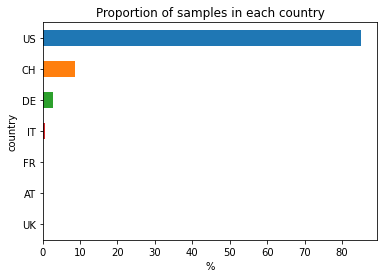

In [47]:
# Explore country category
country_group = df_2.groupby("country")
proportion_country = np.round((((country_group.country.count())/len(df)) * 100), 2).sort_values(ascending=False)

# Visualization of the country of samples
colormap = plt.cm.tab10(range(0, len(proportion_country)))
bar_plot = proportion_country.plot.barh(color=colormap)
bar_plot.set_title("Proportion of samples in each country")
bar_plot.set_xlabel("%")
bar_plot.invert_yaxis()
plt.show(bar_plot)


**Comments** We can see that the dataset contains 85% of US products (with 328 289 products), followed by 11% of swiss samples.

In [48]:
# Explore unit category
unit_group = df.groupby("unit")
proportion_unit = np.round((((unit_group.unit.count())/len(df)) * 100), 2).sort_values(ascending=False)
proportion_unit

unit
g       85.85
ml      12.80
?        0.72
cl       0.27
l        0.23
kg       0.13
dl       0.01
Floz     0.00
Lb       0.00
Oz       0.00
Name: unit, dtype: float64

**Comments** We can see that the dataset contains 85% of the units in grams, followed by 13% of units in ml. This may be due to the fact that measures are considered on a dry weight or could be due to the fact that food products analyzed are mainly dry products and not liquid. 

## 2) Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

In [49]:
# Statistics on numerical variables using float list previously done
# Selection of numerical variables:
numerical_list = list(df.select_dtypes(include=['int', 'float']))
np.round(df[numerical_list].describe(), 2)

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,carbohydrates_per_portion,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_kcal_per_portion,energy_per_hundred,energy_per_portion,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,385384.00,264979.00,351551.00,11480.00,270282.00,3611.00,341824.00,9967.00,341821.00,10920.00,...,192093.00,9874.00,20527.00,19808.00,21242.00,4666.00,13364.00,200256.0,67024.00,8640.00
mean,0.03,116.99,33.90,19.78,58.98,5.47,272.09,159.08,1137.84,684.18,...,494.24,17.48,0.97,1.74,10.49,14.27,1.48,16.0,14.19,6.53
std,0.80,2557.36,40.72,18.76,1934.72,274.47,257.83,139.15,1077.75,608.42,...,2445.25,402.95,13.46,142.16,73.35,342.92,6.13,583.4,73.26,108.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,0.00,0.00,6.67,7.00,0.00,0.21,89.00,78.00,372.38,328.00,...,0.00,0.44,0.00,0.20,3.02,0.62,0.17,0.0,0.00,0.82
50%,0.00,36.00,23.44,16.00,0.00,0.48,267.00,127.00,1117.13,536.00,...,0.00,1.68,0.00,0.34,5.00,1.43,0.53,0.0,0.00,2.78
75%,0.00,102.00,60.00,26.00,25.00,1.07,400.00,194.00,1673.60,800.00,...,352.00,4.50,1.00,0.61,8.33,3.57,1.28,4.0,0.00,6.00
max,57.90,684000.00,6400.00,150.50,250000.00,16483.52,39600.00,1508.00,165686.40,5212.00,...,333333.00,33898.31,1111.00,20000.00,6785.71,16920.47,420.00,210000.0,5000.00,10000.00


**Comments:** We can make a few basic comments looking at these values 
- number of data: there are less data points in per-portion and vitamin columns.
- min/max : All minimum values are 0, which makes sense, however, maximum values can be extreme in per_hundred columns. As an example, carbohydrates and cholesterol cannot be above 100 000mg/100g and carbohydrate can't be above 100g/100g. We have to adress these errors. 

In [50]:
np.round(df[["quantity", "alcohol_by_volume"]].describe(), 2)

,quantity,alcohol_by_volume
count,385384.00,385384.00
mean,97.55,0.03
std,400.34,0.80
min,0.00,0.00
25%,28.00,0.00
50%,43.00,0.00
75%,120.00,0.00
max,230000.00,57.90


In [51]:
# Selection of numerical variables
numerical_list = list(df.select_dtypes(include=['int', 'float']))

# Number of subplots
total_subplots = len(numerical_list)
total_subplots

51

In [52]:
# Function to get the number of rows and columns of the plot
import math

def get_subplot_dimensions(total_subplots):
    # Calculate the square root to get a starting point for the aspect ratio
    sqrt_total = math.sqrt(total_subplots)
    
    # Start with a square grid and adjust
    rows = int(sqrt_total)
    cols = int(sqrt_total)

    # While the product of rows and columns is less than the total, adjust the layout
    while rows * cols < total_subplots:
        rows += 1
    
    return rows, cols

# Print the number of rows and columns of the plot
rows, cols = get_subplot_dimensions(total_subplots)

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 8
Number of columns: 7


**Comment** We do several observations: 
- 1) the values of variables are heterogeneous, aka: there are variables with high values, but most of the variables have low values and it is difficult to visualize them on an histogram graph. We cannot display the values on an x-axis from 0 to 1000. 
- 2) In order to improve the visualization, we could adjust divide variable the variable in different categories

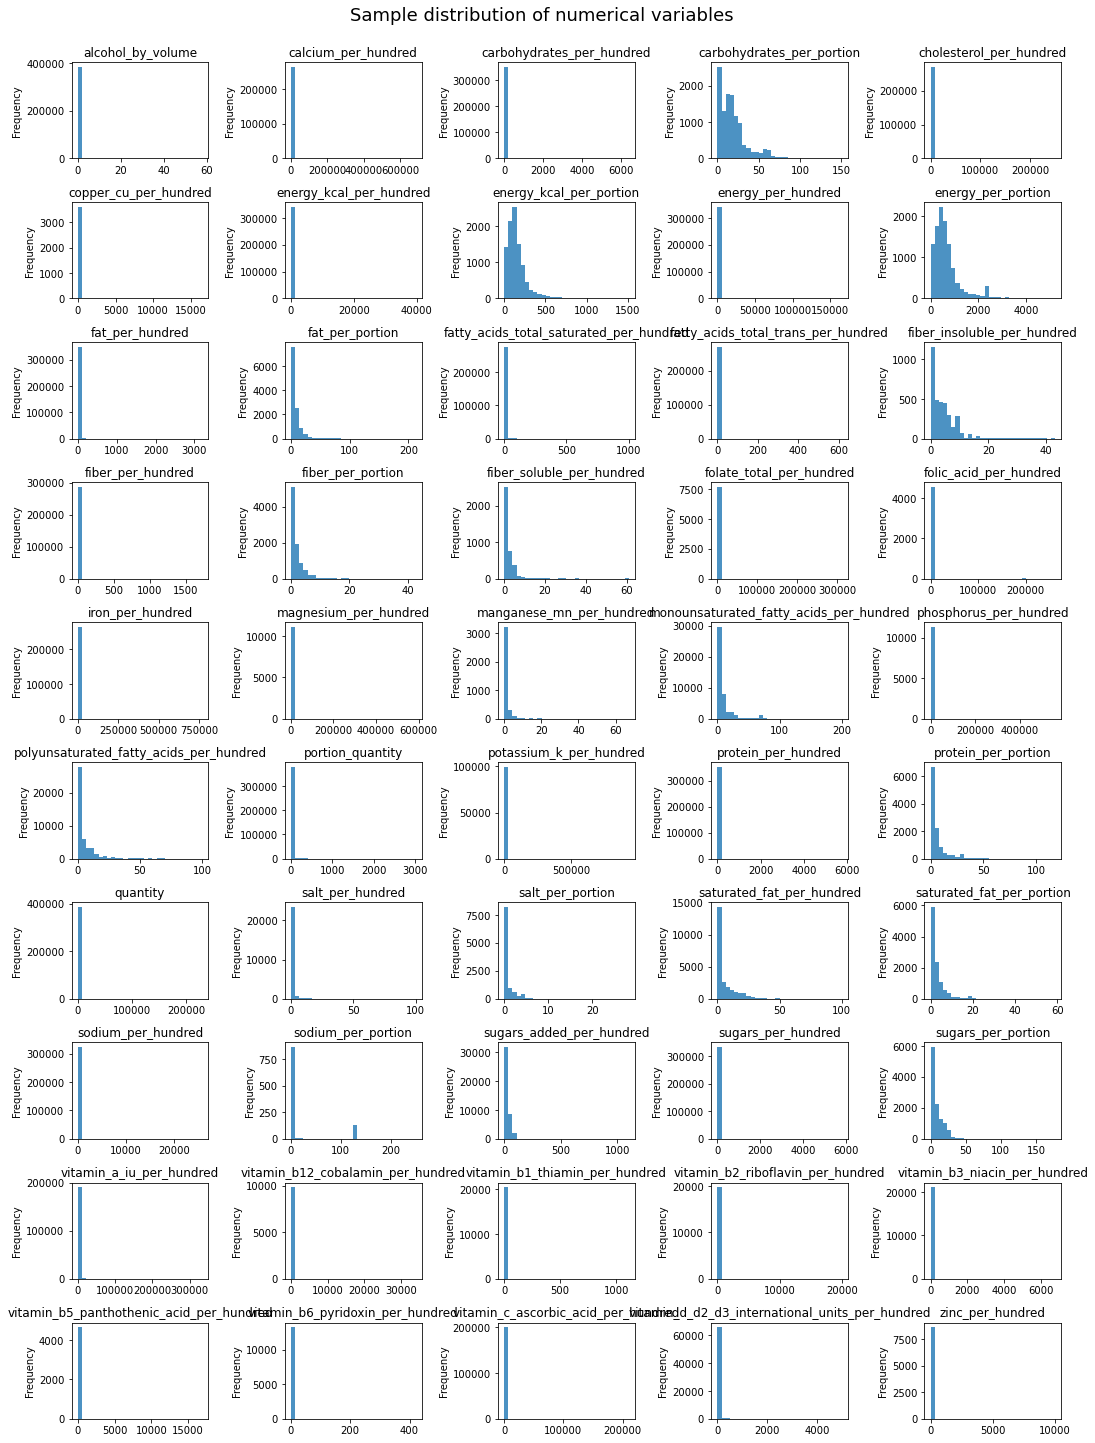

In [53]:
# Build the plot for per_hundred list
fig, axes = plt.subplots(nrows = 10,  
                        ncols = 5,
                        figsize = (15, 20)
                        )
plt.subplots_adjust(hspace=0.7)
fig.suptitle("Sample distribution of numerical variables", y=1.0, fontsize=18)

# Flatten the axes array for easier iteration
for i, ax in zip(float_list, axes.flatten()):
    
    # Filter data for each variable
    variable = df[i]

    #  Populate subplots
    ax.hist(variable, bins=30, alpha = 0.8)
    
    # Add x/y labels and titles
    ax.set_ylabel("Frequency")
    ax.set(title=i)
    
fig.tight_layout()

### 3) identify and address the problematic values within the per_hundred columns. Afterwards re-run the descriptive statistics and plots to check if everything is ok 

In [54]:
df_2[per_hundred_list].describe().round()

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,264854.0,348551.0,270282.0,3611.0,338574.0,338571.0,345260.0,279151.0,269607.0,3509.0,...,192093.0,9749.0,20402.0,19683.0,21117.0,4541.0,13239.0,200006.0,67024.0,8515.0
mean,117.0,34.0,59.0,5.0,272.0,1140.0,13.0,5.0,0.0,4.0,...,494.0,17.0,1.0,2.0,10.0,13.0,1.0,16.0,14.0,6.0
std,2558.0,41.0,1935.0,274.0,258.0,1080.0,20.0,9.0,1.0,5.0,...,2445.0,406.0,13.0,143.0,73.0,348.0,6.0,584.0,73.0,109.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,7.0,0.0,0.0,89.0,372.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0
50%,36.0,24.0,0.0,0.0,267.0,1117.0,5.0,2.0,0.0,3.0,...,0.0,2.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,3.0
75%,102.0,60.0,25.0,1.0,400.0,1674.0,20.0,7.0,0.0,6.0,...,352.0,4.0,1.0,1.0,8.0,3.0,1.0,4.0,0.0,6.0
max,684000.0,6400.0,250000.0,16484.0,39600.0,165686.0,3200.0,1000.0,615.0,43.0,...,333333.0,33898.0,1111.0,20000.0,6786.0,16920.0,420.0,210000.0,5000.0,10000.0


**Comments:** Per_hundred values should be included into a range from 0 to 100g. However, we observe that minimum values are 0, but sometimes, maximum values are well above 100g, whatever the unit is. There are errors and to adress this issue:
A) We build a dataframe to store each unit with its own limit.
B) We identify the number of errors elements.
C) We drop or replace by NaN error values.

In [55]:
# 3.A Build a dataframe to store each unit based on per_hundred_elements, units_list and the range of values for each unit: 
# Check the number of elements in per_hundred and unit_list:
len(per_hundred_list)

37

In [56]:
len(unit_list)

39

**Comments:** We can see that the per_hundred list and the unit_list do not have the same number of values. Conseqently, we create a new list called "unit_list_2" which store the new units without "portion_unit" and h"undred_unit"

In [57]:
# Creation of a new unit list without the two units which are not included into the per_hundred_list
unit_list_2 = unit_list.copy()
unit_list_2.remove("portion_unit")
unit_list_2.remove("hundred_unit")
unit_list_2

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'potassium_k_unit',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_unit',
 'zinc_unit']

In [58]:
# Build a new unit_list which has the unit values with adjusted vitamin values 
unit_values_2 = []

for unit2 in unit_list_2:
    y = df_2[unit2].value_counts().idxmax()
    unit_values_2.append(y) 
    
# Replace IU with IU_a and IU_d to identify each type of vitamin
unit_values_2[-2] = "IU_d"
unit_values_2[-10] = "IU_a"

unit_values_2

['mg',
 'g',
 'mg',
 'mg',
 'kCal',
 'kJ',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'µg',
 'µg',
 'mg',
 'mg',
 'mg',
 'g',
 'mg',
 'g',
 'mg',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'IU_a',
 'µg',
 'mg',
 'mg',
 'mg',
 'mg',
 'mg',
 'mg',
 'IU_d',
 'mg']

In [59]:
# Build a dictionary with the limit values for each unit
limit_dict = {
    'g': 100, 
    'mg': 100000,
    'kCal': 885,
    'kJ': 3700,
    'µg': 100000000,
    'IU_a': 330000000,
    'IU_d': 400000000
}
limit_dict

{'g': 100,
 'mg': 100000,
 'kCal': 885,
 'kJ': 3700,
 'µg': 100000000,
 'IU_a': 330000000,
 'IU_d': 400000000}

In [60]:
# Fill a new dataframe called variable_df with limit values from the dictionary and the limits according to the disctionary
d = {'units': unit_values_2}
variable_df = pd.DataFrame(index=per_hundred_list, data=d)
variable_df["limit value"] = variable_df["units"].map(limit_dict)
variable_df

,units,limit value
calcium_per_hundred,mg,100000
carbohydrates_per_hundred,g,100
cholesterol_per_hundred,mg,100000
copper_cu_per_hundred,mg,100000
energy_kcal_per_hundred,kCal,885
energy_per_hundred,kJ,3700
fat_per_hundred,g,100
fatty_acids_total_saturated_per_hundred,g,100
fatty_acids_total_trans_per_hundred,g,100
fiber_insoluble_per_hundred,g,100


**Comments:** Once the dataframe with units and values is built, we can identify problematic values into the main dataframe df_2.

In [61]:
# Build a dataframe sorted from highest values to lowest values to vizualize the problematic values
above_limit = []
for i in per_hundred_list:
    x = len(df_2[df_2[i] > variable_df.loc[i, "limit value"]])
    above_limit.append(x)
    
d = {"number of values out of limits": above_limit}
above_limit_df = pd.DataFrame(index=per_hundred_list, columns=["number of values out of limits"], data=d)
above_limit_df.sort_values(["number of values out of limits"], ascending=False)

,number of values out of limits
carbohydrates_per_hundred,1076
energy_kcal_per_hundred,888
energy_per_hundred,829
sugars_per_hundred,443
sodium_per_hundred,188
protein_per_hundred,172
fat_per_hundred,136
sugars_added_per_hundred,96
potassium_k_per_hundred,81
fatty_acids_total_saturated_per_hundred,32


**Comments:** We can see that the number of values above the limits is limited to a few number of variable with only 7 variables with incorrect values. To adress it, We propose to drop these values.

In [62]:
# Exclusion of error values using a for loop and check of remaining datas
for col in per_hundred_list:
    filter_out_limit = df_2[col] > variable_df.loc[col, "limit value"]
    df_2 = df_2.loc[~filter_out_limit, :]
    print(col, df_2.shape)
    
df_2.head()

calcium_per_hundred (374866, 100)
carbohydrates_per_hundred (373791, 100)
cholesterol_per_hundred (373770, 100)
copper_cu_per_hundred (373770, 100)
energy_kcal_per_hundred (373193, 100)
energy_per_hundred (373191, 100)
fat_per_hundred (373167, 100)
fatty_acids_total_saturated_per_hundred (373154, 100)
fatty_acids_total_trans_per_hundred (373153, 100)
fiber_insoluble_per_hundred (373153, 100)
fiber_per_hundred (373147, 100)
fiber_soluble_per_hundred (373147, 100)
folate_total_per_hundred (373147, 100)
folic_acid_per_hundred (373147, 100)
iron_per_hundred (373145, 100)
magnesium_per_hundred (373142, 100)
manganese_mn_per_hundred (373142, 100)
monounsaturated_fatty_acids_per_hundred (373140, 100)
phosphorus_per_hundred (373138, 100)
polyunsaturated_fatty_acids_per_hundred (373138, 100)
potassium_k_per_hundred (373058, 100)
protein_per_hundred (373039, 100)
salt_per_hundred (373039, 100)
saturated_fat_per_hundred (373039, 100)
sodium_per_hundred (372866, 100)
sugars_added_per_hundred (3728

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit,iron_per_hundred_amended
0,0.0,8001772000030,NaN,mg,75.00,37.50,g,NaN,mg,NaN,...,mg,NaN,mg,NaN,mg,NaN,IU,NaN,mg,7.621178
1,0.0,7610809001066,NaN,mg,1.50,1.13,g,NaN,mg,NaN,...,mg,NaN,mg,NaN,mg,NaN,IU,NaN,mg,7.621178
2,0.0,8002530159021,NaN,mg,52.68,NaN,g,NaN,mg,NaN,...,mg,NaN,mg,NaN,mg,NaN,IU,NaN,mg,7.621178
3,0.0,3033715065788,NaN,mg,70.40,11.97,g,NaN,mg,NaN,...,mg,NaN,mg,NaN,mg,NaN,IU,NaN,mg,7.621178
4,0.0,7610848492740,NaN,mg,37.00,7.40,g,NaN,mg,NaN,...,mg,NaN,mg,NaN,mg,NaN,IU,NaN,mg,7.621178


In [63]:
# Re-run descriptive analytics to visualize if everything is in line with expectations:
df_2[per_hundred_list].describe().round()

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,...,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
count,264362.0,346629.0,269464.0,3590.0,336556.0,336558.0,343933.0,278104.0,268346.0,3505.0,...,191859.0,9712.0,20368.0,19642.0,21084.0,4515.0,13210.0,199741.0,66906.0,8488.0
mean,97.0,33.0,43.0,5.0,268.0,1121.0,12.0,5.0,0.0,4.0,...,492.0,17.0,1.0,2.0,10.0,13.0,1.0,14.0,14.0,6.0
std,520.0,29.0,1178.0,275.0,188.0,785.0,17.0,7.0,0.0,5.0,...,2432.0,406.0,14.0,143.0,73.0,349.0,6.0,344.0,70.0,109.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,7.0,0.0,0.0,89.0,372.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0
50%,36.0,24.0,0.0,0.0,267.0,1117.0,5.0,2.0,0.0,3.0,...,0.0,2.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,3.0
75%,102.0,60.0,24.0,1.0,400.0,1674.0,20.0,7.0,0.0,6.0,...,352.0,4.0,1.0,1.0,8.0,3.0,1.0,4.0,0.0,6.0
max,93750.0,100.0,100000.0,16484.0,885.0,3700.0,100.0,100.0,54.0,43.0,...,333333.0,33898.0,1111.0,20000.0,6786.0,16920.0,420.0,71429.0,5000.0,10000.0


**Comments:** We can see that some errors disappeared from the dataframe and that maximum values have been readjusted. As an example, the cholesterol_per_hundred maximum is now 100 000 instead of 250 000. Carbohydrate per hundred is now 100g instead of 6400 and energy_kcal per_hundred is now 885kcal

### 4) Identify potential inconsistencies between columns and address them in 3 cases

### a) Identify discrepancies in macronutrients categories

In [64]:
# calculation of the total of macronutient and creation of the list of macronutrients
df_2["total_macronutrients"] = df_2["fat_per_hundred"] + df_2["protein_per_hundred"] + df_2["carbohydrates_per_hundred"] + df_2["fiber_per_hundred"]
# Creation of a list of the 4 macronutrients and their total
macro_list = ["fat_per_hundred", "protein_per_hundred", "carbohydrates_per_hundred", "fiber_per_hundred", "total_macronutrients"]

In [65]:
df_2[macro_list].describe().round()

,fat_per_hundred,protein_per_hundred,carbohydrates_per_hundred,fiber_per_hundred,total_macronutrients
count,343933.0,348531.0,346629.0,283578.0,280214.0
mean,12.0,7.0,33.0,3.0,59.0
std,17.0,9.0,29.0,5.0,35.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,7.0,0.0,25.0
50%,5.0,5.0,24.0,2.0,58.0
75%,20.0,10.0,60.0,4.0,93.0
max,100.0,100.0,100.0,100.0,300.0


**Comments:** There is clearly an issue with a maximum value at 2400g per 100g. There are issues to fix on the fat, protein and fiber columns as well. We have to identify the rows with a total of macronutrients above 100 and address them. To do so, we decide to replace ouliers by the 3rd quartile value; 20g for fat, 10g for protein and 4g for fiber. 

In [66]:
# Identification of rows above 100g
len(df_2[df_2["total_macronutrients"] > 100 ])

27830

There are currently 28387 rows with a total of macronutrient strictly above 100. 
As a first step, we can address values which are strictly above 100 and replace them by 100.

In [67]:
# Define the threshold value
threshold_value = 100

for i in macro_list:
    above_threshold_a = len(df_2[i].loc[df_2[i] > threshold_value])
    print(f"The number of {i} values above 100 is {above_threshold_a}" )

The number of fat_per_hundred values above 100 is 0
The number of protein_per_hundred values above 100 is 0
The number of carbohydrates_per_hundred values above 100 is 0
The number of fiber_per_hundred values above 100 is 0
The number of total_macronutrients values above 100 is 27830


In [68]:
# We replace these values by 100
#df_2["fat_per_hundred"].loc[df_2["fat_per_hundred"] > threshold_value] = 20
#df_2["protein_per_hundred"].loc[df_2["protein_per_hundred"] > threshold_value] = 10
#df_2["carbohydrates_per_hundred"].loc[df_2["carbohydrates_per_hundred"] > threshold_value] = 60
#df_2["fiber_per_hundred"].loc[df_2["fiber_per_hundred"] > threshold_value] = 4
    
#for i in macro_list:    
#    above_threshold_b = len(df_2[i].loc[df_2[i] > threshold_value])
#    print(f"After replacement, the number of {i} values above 100 is {above_threshold_b}" )

In [69]:
# Checking the values after replacement of the outliers
df_2[macro_list].describe().round()

,fat_per_hundred,protein_per_hundred,carbohydrates_per_hundred,fiber_per_hundred,total_macronutrients
count,343933.0,348531.0,346629.0,283578.0,280214.0
mean,12.0,7.0,33.0,3.0,59.0
std,17.0,9.0,29.0,5.0,35.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,7.0,0.0,25.0
50%,5.0,5.0,24.0,2.0,58.0
75%,20.0,10.0,60.0,4.0,93.0
max,100.0,100.0,100.0,100.0,300.0


**Comments:** After the replacement, the 4 columns look better. The means haven't changed, but the standart deviation changed slightly.

### b) The column "energy_per_hundred" measures the energy content in kJ. Analyze its relationship with the column "energy_kcal_per_hundred".

**Comments:** 1 calorie has an equivalent of 4.184 joules. To analyze the relationship, we can check if the relation has been well applied into the dataset by multiplying the energy_kcal column by 4.184 and check if the values are similar with the energy column in joules.

In [70]:
# Creation of a column called "energy_kcal_to_kj) which is the conversion from KCal to KJ
df_2["energy_kcal_to_kj"] = df_2["energy_kcal_per_hundred"] * 4.184
energy_list = ["energy_kcal_per_hundred","energy_per_hundred", "energy_kcal_to_kj"]
df_2[energy_list].describe().round()


,energy_kcal_per_hundred,energy_per_hundred,energy_kcal_to_kj
count,336556.0,336558.0,336556.0
mean,268.0,1121.0,1121.0
std,188.0,785.0,785.0
min,0.0,0.0,0.0
25%,89.0,372.0,372.0
50%,267.0,1117.0,1117.0
75%,400.0,1674.0,1674.0
max,885.0,3700.0,3703.0


**Comments:** We see into the statistics that the new converted KJ columns hasn't discrepancies with the per_hundred column which mean that the ratio of 4.184 has been well applied into the dataframe.

### c) Each of the four macronutrients has a specific energy content (fat 37 kJ/g, protein and carbohydrates 17 kJ/g, fibre 8 kJ/g). Calculate the energy provided by these four macronutrients and compare this to the "energy_per_hundred"-column. Keep in mind that we are only looking at a subset of all the nutrients.

**Comments:** We convert these four macronutrients into joules and compare the sum of energy with the column "energy_per_hundred". These four nutrients are measures in g, therefore, we can multiply the value with the energy content.

In [71]:
# Creation of a DataFrame with macronutrients with their energy contents
df_2["fat_energy"] = df_2["fat_per_hundred"] * 37
df_2["protein_energy"] = df_2["protein_per_hundred"] * 17
df_2["carbohydrates_energy"] = df_2["carbohydrates_per_hundred"] * 17
df_2["fiber_energy"] = df_2["fiber_per_hundred"] * 8
df_2["total_energy_nutrients"] = df_2["fat_energy"] + df_2["protein_energy"] + df_2["carbohydrates_energy"] + df_2["fiber_energy"]


In [72]:
# Comparison of the energy brought by each macronutient and the total energy per hundred
df_2[["total_energy_nutrients", "energy_per_hundred"]].describe().round()

,total_energy_nutrients,energy_per_hundred
count,280214.0,336558.0
mean,1229.0,1121.0
std,772.0,785.0
min,0.0,0.0
25%,485.0,372.0
50%,1252.0,1117.0
75%,1800.0,1674.0
max,5400.0,3700.0


**Comments** We can see that the number of values in the column "energy_per_hundred" at 336 558 rows is well above the number of rows of macronutrients. Therefore, we cannot compare the two columns properly. 

In [73]:
# Calculation of the difference of the sum of energy provided by macronutrients and the energy per hundred measured
diff = df_2["total_energy_nutrients"] - df_2["energy_per_hundred"]
diff.head()

0    NaN
1    4.5
2    NaN
3   -1.5
4   -5.0
dtype: float64

In [74]:
# Calculation of the mean of this difference
diff.mean()

44.307655216714885

The mean of difference is 44.31KJoules which can be considered as low. As an example, 44 KJoules is slightly above the energy provided by 1g of fat (38KJ/g).
This difference of energy could be explained by the error of measurement. Consequently, the macronutrient values provided are accepted.

## 5) Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables are strongly skewed.

In [75]:
# Creation of a list of 6 variables to keep
variables_to_keep = ["calcium_per_hundred", "iron_per_hundred", "fat_per_hundred", "sugars_per_hundred",  "cholesterol_per_hundred", "vitamin_c_ascorbic_acid_per_hundred",]
df_2[variables_to_keep].describe().round()

,calcium_per_hundred,iron_per_hundred,fat_per_hundred,sugars_per_hundred,cholesterol_per_hundred,vitamin_c_ascorbic_acid_per_hundred
count,264362.0,263934.0,343933.0,328567.0,269464.0,199741.0
mean,97.0,3.0,12.0,17.0,43.0,14.0
std,520.0,127.0,17.0,21.0,1178.0,344.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,2.0,0.0,0.0
50%,36.0,1.0,5.0,6.0,0.0,0.0
75%,102.0,2.0,20.0,25.0,24.0,4.0
max,93750.0,26667.0,100.0,100.0,100000.0,71429.0


**Comments:** We can see that these 6 variables have maximum values well above the third quartile, we have to identfy if these values are errors or outliers. 
For a first approach, we can build box plots to identify the kind of selection process to use. 
- *Number of data* : We note that the number of data is slightly lower for vitamin C versus other variables. 
- *Standart deviation* : Standart deviation is extremely high for calcium, iron, cholesterol and vitamin C which mean that the dataset values are heterogeneous.
- *mean* : we can see that the mean is very close or above the 3rd quartile for most of the variable. Likely due to extreme maximum values which are skewing the distribution shape to the right side. Furthermore, it suggests that data are not normally distributed and right skewed.
- *max /min* : minimum values are 0, but we can highlight a large number of 0 as the first quartile is 0 in 5 out of 6 variables, which could be correct, or meaning that many missing values have been replaced by 0. Maximum values are very high compare to rest of the data which reveal the presence of outliers or error. We have to look at the distribution with boxplot, check them and see if they must be removed. 



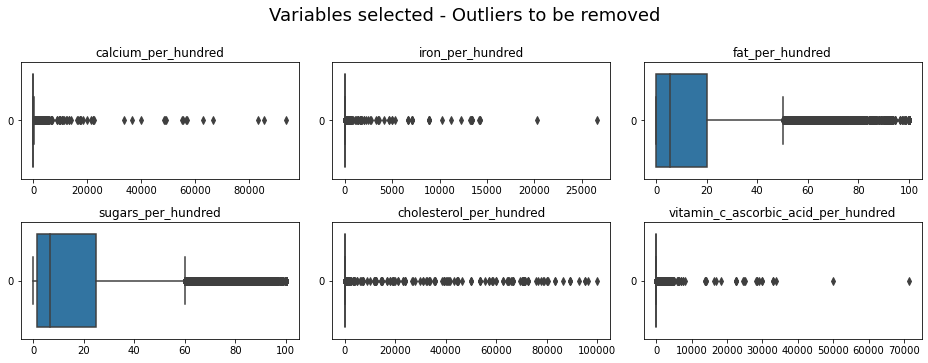

In [76]:
# Build the plot for per_hundred list
fig, axes = plt.subplots(nrows = 2,  
                        ncols = 3,
                        figsize = (13, 5)
                        )
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Variables selected - Outliers to be removed", y=1.0, fontsize=18)

# Flatten the axes array for easier iteration
for name, ax in zip(variables_to_keep, axes.flatten()):
    x = len(name)
    # Filter data for each variable
    variable = df_2[name]

    #  Populate subplots
    sns.boxplot(data=variable, ax=ax, orient="h")
    
    # Add x/y labels and titles
    ax.set(title=name)
    
fig.tight_layout()

**Comments:** Looking at the box plots:
- None of the distribution look normally distributed and strongly skewed on the right side = We won't use the Z-score to adress outliers.
- iron, vitamin C and calcium have a low number of extreme values. 
- Sugar, cholesterol and saturated fat have a higher number of extreme values. 

1) To have a better idea of the shape of the distribution, we will look closely the distribution without 0
We decide to filter outliers manually for iron, vitamin C and calcium and using the interquartile range for sugar, cholesterol and fats.

In [77]:
# Removing 0 to visualize the shape of the distribution for each variable. 
filter_fat_0 = df_2["fat_per_hundred"] == 0
df_2_fat_0 = df_2.loc[filter_fat_0, ["product_name_en", "fat_per_hundred"]]
df_2_fat_sup_0 = df_2.loc[~filter_fat_0, ["product_name_en", "fat_per_hundred"]]
df_2_fat_0.shape
#print(len(df_2_fat_0)), print(len(df_2_fat_sup_0)
#filter_any_0 = df_2[variables_to_keep].any(axis=1)

(99493, 2)

In [78]:
# Removing 0 to visualize the shape of the distribution for each variable. 
filter_iron_0 = df_2["iron_per_hundred"] == 0
df_2_iron_0 = df_2.loc[filter_iron_0, ["product_name_en", "iron_per_hundred"]]
df_2_iron_sup_0 = df_2.loc[~filter_iron_0, ["product_name_en", "fat_per_hundred"]]
df_2_iron_0.shape, df_2_iron_sup_0.shape
#print(len(df_2_fat_0)), print(len(df_2_fat_sup_0)
#filter_any_0 = df_2[variables_to_keep].any(axis=1)

((77493, 2), (295344, 2))

In [79]:
for name in variables_to_keep:
    #name of variables
    #filter_name = f"filter_{name}"
    filter_name = df_2[name] == 0
    #Calculate the number of 0 in each variable 
    #df_2_0 = f"df_2_{name}_0"
    df_2_0 = df_2.loc[filter_name, ["product_name_en", name]]
    # Calculate the number of values different from 0 in each variable
    df_2_above_0 = df_2.loc[~filter_name, ["product_name_en", name]]
    nb_0 = len(df_2_0)
    nb_sup_0 = len(df_2_above_0)
    print(f"On the variable {name}, the number of values at 0 is {nb_0} and the number of values above 0 is {nb_sup_0}") 
    #printprint(df_2_0.shape), print(name)


On the variable calcium_per_hundred, the number of values at 0 is 83196 and the number of values above 0 is 289641
On the variable iron_per_hundred, the number of values at 0 is 77493 and the number of values above 0 is 295344
On the variable fat_per_hundred, the number of values at 0 is 99493 and the number of values above 0 is 273344
On the variable sugars_per_hundred, the number of values at 0 is 58402 and the number of values above 0 is 314435
On the variable cholesterol_per_hundred, the number of values at 0 is 157244 and the number of values above 0 is 215593
On the variable vitamin_c_ascorbic_acid_per_hundred, the number of values at 0 is 125059 and the number of values above 0 is 247778


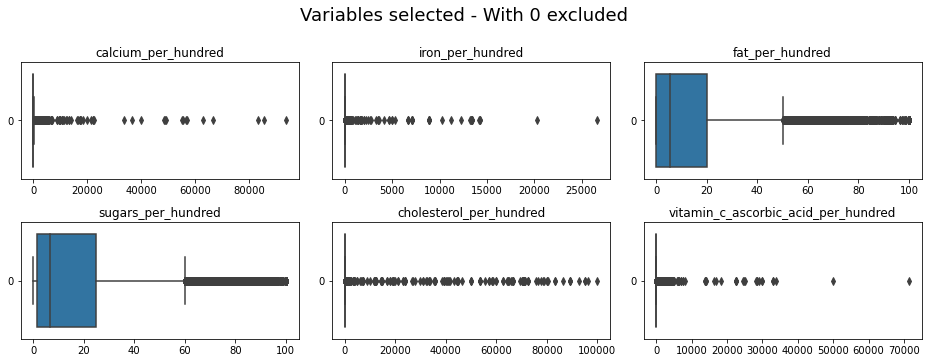

In [80]:
# Build the plot for per_hundred list
fig, axes = plt.subplots(nrows = 2,  
                        ncols = 3,
                        figsize = (13, 5)
                        )
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Variables selected - With 0 excluded", y=1.0, fontsize=18)

# Flatten the axes array for easier iteration
for name, ax in zip(variables_to_keep, axes.flatten()):
    x = len(name)
    # Filter data for each variable
    variable = df_2[name]

    #  Populate subplots
    sns.boxplot(data=variable, ax=ax, orient="h")
    
    # Add x/y labels and titles
    ax.set(title=name)
    
fig.tight_layout()

In [81]:
for name in variables_to_keep:
    filter_0 = df_2[name] == 0
    df_2_0 = df2.loc

NameError: name 'df2' is not defined

### Filtering outliers

In [ ]:
# Observation of extreme values:
filter_calcium = df_2["calcium_per_hundred"] > 30000
filter_iron = df_2["iron_per_hundred"] > 5000
filter_fat = df_2["fat_per_hundred"] > 90
filter_vitamin = df_2["vitamin_c_ascorbic_acid_per_hundred"] > 10000
filter_sugar = df_2["sugars_per_hundred"] > 90
filter_cholesterol = df_2["cholesterol_per_hundred"] > 80000

# Selection of outliers                 
outliers_calcium = df_2.loc[filter_calcium, ["product_name_en", "calcium_per_hundred"]]
outliers_iron = df_2.loc[filter_iron, ["product_name_en", "iron_per_hundred"]]
outliers_fat = df_2.loc[filter_fat, ["product_name_en", "fat_per_hundred"]]
outliers_vitamin = df_2.loc[filter_vitamin, ["product_name_en", "vitamin_c_ascorbic_acid_per_hundred"]]
outliers_sugar = df_2.loc[filter_sugar, ["product_name_en", "sugars_per_hundred"]]
outliers_cholesterol = df_2.loc[filter_cholesterol, ["product_name_en", "cholesterol_per_hundred"]]

In [ ]:
# Observation of possible outliers and calculation of their number
outliers_calcium.head(10), outliers_calcium.shape, outliers_iron.head(10),  outliers_iron.shape, outliers_fat.head(10), outliers_fat.shape, outliers_vitamin.head(10), outliers_vitamin.shape, outliers_sugar.head(5), outliers_sugar.shape, outliers_cholesterol.head(15), outliers_cholesterol.shape 


**Comments:** 
- Products with the highest calcium contents (above 30000mg/100g) are variable from chips to crackers or bubble gums.
- Product with iron contents above 5000mg/100g can be included into different categories from meat to cereals. 
- Products with fat contents above 80g/100g are quite homogeneous such as vegetable oil, cream and butter. We could create a sub-category for this kind of products with high levels of fats. 
- Without surprise, samples with vitamin C contents above 10000mg/100g are juices (orange, fruits blending) , but we can see seasonings as well. These products are very concentrated
- Products with sugar contents above 90g/100g of sugar are pure sugars (canne, powder sugar) and candies (caramel). 
- Products with cholesterol values above 80000mg/100g of cholesterol are very heterogeneous such as cheese, transformed meat such as ham or salame.

Consequently, we propose to :
1) create sub caterogories for outliers for specific type of products such as fat and sugar called high_fat and high_sugar product. 
2) For the rest of the products we will erase outliers selecting them using interquartile range. 


In [ ]:
# 5.1 Creation of sub-categories for fat and sugar
High_fat_filter = df_2["fat_per_hundred"] > 90
High_sugar_filter = df_2["sugars_per_hundred"] > 90

df_2_keep = df_2.loc[(~High_fat_filter) & (~High_sugar_filter)]
df_2_keep[variables_to_keep].describe().round()

# Number of rows included into the two sub-categories
fb = len(df_2[High_sugar_filter])
fa = len(df_2[High_fat_filter])
print(f"the number of sample included into the high fat category is {fa} and the number of high sugar sample is {fb}")


**Comments:** We managed to exclude the subpopulations from the dataset. Now we will flag outliers using the boxplot method and applying a lower bound of 1.50 IQR and 3IQR 

In [ ]:
# Outlier calculation using the boxplot method
Q1 = np.nanpercentile(df_2["fat_per_hundred"], 25, axis=0)
Q3 = np.nanpercentile(df_2["fat_per_hundred"], 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# test
test = np.arange(100)
Q_test = np.percentile(test, 25, axis=0)

#print(f"Lower bound: {lower_bound}, upper bound: {upper_bound}")
Q_test
Q3

In [ ]:
list_1 = list(df_2["fat_per_hundred"])
Q1 = np.percentile(list_1, 25, axis=0)
Q1 

# Structures to keep

In [ ]:
#Distribution of quantity of samples
quantity = df["quantity"]
#Intervals
intervals = np.arange(0, 1000, 30)
#Plotting the histogram
fig, ax = plt.subplots()

ax.hist(quantity, intervals)
ax.set_title("Sample distribution by quantity")
ax.set_ylim(0, 150000)
ax.set_ylabel("Number samples")
ax.set_xlabel("Quantity : Dry net wight or volume")
plt.show()

In [ ]:
# Build 2 subplots
fig, axes = plt.subplots(nrows = 1,  
                         ncols = 2,
                         figsize = (12, 3.5))

#data chart 1 & 2
quantity_a = df["calcium_per_hundred"]
quantity_b = df["carbohydrates_per_hundred"]
#Intervals
intervalsa = np.arange(0, 500, 50)

# Populate subplot 1
axes[0].hist(quantity_a, intervalsa)

# Populate subplot 2
axes[1].hist(quantity_b, intervalsa)

plt.show()

In [ ]:
#Distribution of quantity of samples
quantity = df_2["sugars_per_hundred"]
#Intervals
intervals = np.arange(0, 100, 1)
#Plotting the histogram
fig, ax = plt.subplots()

ax.hist(quantity, intervals)

plt.ylim(1, 75000)
ax.set_title("Distribution of sugar content")

ax.set_ylabel("Number samples")
ax.set_xlabel("Quantity of sugar")
plt.show()

In [ ]:
**Comments:** We can see that the sugar content is not normally distributed with 75% of the samples having a suger content below 25%. However, we see that a few products have a lot of sugar contents. Lets look at it closely and adress them.

In [ ]:
#Distribution of quantity of samples
quantity = df_2["saturated_fat_per_hundred"]
#Intervals
intervals = np.arange(0, 100, 1)
#Plotting the histogram
fig, ax = plt.subplots()

ax.hist(quantity, intervals)

plt.ylim(1, 10000)
ax.set_title("Distribution of saturated fat content")

ax.set_ylabel("Number samples")
ax.set_xlabel("Quantity of sugar")
plt.show()

In [ ]:
#pd.options.display.max_rows = 999
#pd.options.display.max_columns = 999

In [ ]:
# Define the threshold value
threshold_value = 100

# Define the value to replace with
replace_value = 100

# Replace values above the threshold with the replace_value
for i in macro_list:
    fa = len(df_2.loc[df_2[i] > threshold_value, i])
    df_2.loc[df_2[i] > threshold_value, i] = replace_value
    fb = len(df_2.loc[df_2["fat_per_hundred"] > threshold_value, "fat_per_hundred"])
print(f"Number of values above 100 before replacement: {fa}")
print(f"Number of values above 100 after replacement:: {fb}")

In [ ]:
y = df[unit_list] == "g"
y.columns[y.any()]

In [ ]:
unit_values_3 = []
for unit in unit_list:
    y = df_2[unit].value_counts()
    unit_values_3.append(y)  
    
df_unit_list = pd.DataFrame(unit_values_3)
unit_values_3

In [ ]:
y = df[unit_list] == "g"
g_list= list(y.columns[y.any()])
g_list

In [ ]:
y = df[unit_list] == "g"
g_list= list(y.columns[y.any()])
g_list

In [ ]:
# Calculation of the difference betwen the energy converted to KJ and the column energy 
filter_difference_energy = (df_2["total_energy_nutrients"] - df_2["energy_per_hundred"]) != 0
macro_energy_list = ["total_energy_nutrients", "energy_per_hundred"]
difference_energy = df_2.loc[filter_difference_energy, macro_energy_list] 
difference_energy.head().round()

In [ ]:
# Build a list which has unit values 
unit_values_2 = []

for unit2 in unit_list_2:
    y = df_2[i].unique()
    x = str(y[0])
    unit_values_2.append(x)

unit_values_2

Here is the end of the notebook
<a id="bottom"></a>
[back to top](#top)